In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ece657a-w20-asg3-part2/train.csv
/kaggle/input/ece657a-w20-asg3-part2/testX.csv


In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint, History

In [3]:
train = pd.read_csv("/kaggle/input/ece657a-w20-asg3-part2/train.csv")
test = pd.read_csv('/kaggle/input/ece657a-w20-asg3-part2/testX.csv')
#X = train.[:,2:]
df = train.iloc[:,1:].copy()
df_test = test.copy()
df.head()
df.shape
df_test.shape

(10000, 785)

In [4]:
print('Train: ', df.shape)
print('Test: ', df_test.shape)
df['Label'].value_counts()

Train:  (60000, 785)
Test:  (10000, 785)


4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


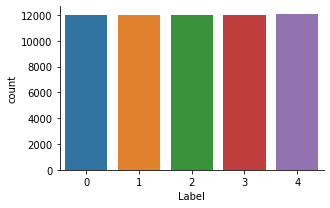

In [7]:
sns.factorplot(x='Label', data=train, kind='count', size=3, aspect= 1.5)

In [8]:
X = train.iloc[:,2:]
Y = train.iloc[:,1] #train labels
testX=test.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X.shape
testX.shape

(10000,)

In [9]:
df_test

,Id,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,0,0,0,0,0,0,0,1,0,...,169,131,0,0,0,0,0,0,0,0
9998,9998,0,0,0,1,0,0,0,0,24,...,85,104,138,51,0,3,0,0,0,0


In [10]:
#reshape of data needed as various layers of cnn need l*b*no of channels
#here -1 means  want numpy to figure it out

x_train = x_train.values.reshape((-1, 28, 28, 1))
x_test = x_test.values.reshape((-1, 28, 28, 1))
print(x_train.shape) #(48000, 28, 28, 1)
df_test.drop('Id', axis=1, inplace=True)
df_test = df_test.values.reshape((-1, 28, 28, 1))
print(X.shape) #(60000, 784)
df_test.shape #(10000, 28, 28, 1)

(48000, 28, 28, 1)
(60000, 784)


(10000, 28, 28, 1)

In [15]:
# preprocessing the data
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
df_test = df_test.astype("float32")/255
print(x_test.shape)
x_train.shape

(12000, 28, 28, 1)


(48000, 28, 28, 1)

In [16]:
df_test.shape

(10000, 28, 28, 1)

In [18]:
x_train.shape

(48000, 28, 28, 1)

# **CNN**

In [19]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)#, num_classes=5)
y_test = to_categorical(y_test)#, num_classes=10)

Using TensorFlow backend.


In [21]:
print(y_train.shape)
print(y_test.shape)

(48000, 5)
(12000, 5)


In [22]:
import time
start_train = time.time()

In [24]:


#modelcheckpoint = ModelCheckpoint("keras.model", savebest_only=True, verbose=1)
# used to save the best model in keras.model
checkpointer = ModelCheckpoint(filepath="keras.model", verbose=0, save_best_only=True)

In [25]:
monitor = EarlyStopping(monitor='val_accuracy', min_delta=1e-3, patience=10, verbose=1, mode='auto',restore_best_weights = True)

Model 1 (as mentioned in report)

In [26]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))


In [27]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
# Compiling the model
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)              

In [28]:
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32,callbacks=[monitor,checkpointer])#Plan1
#The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point.
#After that point, the model will stop improving during each epoch.

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 250us/step - loss: 0.6311 - accuracy: 0.7329 - val_loss: 0.5405 - val_accuracy: 0.7780
Epoch 2/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.4471 - accuracy: 0.8195 - val_loss: 0.4612 - val_accuracy: 0.8071
Epoch 3/50
48000/48000 [==============================] - 12s 244us/step - loss: 0.3862 - accuracy: 0.8455 - val_loss: 0.3605 - val_accuracy: 0.8645
Epoch 4/50
48000/48000 [==============================] - 11s 240us/step - loss: 0.3564 - accuracy: 0.8579 - val_loss: 0.3367 - val_accuracy: 0.8615
Epoch 5/50
48000/48000 [==============================] - 11s 239us/step - loss: 0.3307 - accuracy: 0.8695 - val_loss: 0.3678 - val_accuracy: 0.8532
Epoch 6/50
48000/48000 [==============================] - 11s 235us/step - loss: 0.3111 - accuracy: 0.8753 - val_loss: 0.3218 - val_accuracy: 0.8755
Epoch 7/50
48000/48000 [==============================] 

In [29]:
y_pred_svc_pca = model.predict(df_test) #/testX
abc=np.argmax(y_pred_svc_pca, axis=1)
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12000/12000 [==============================] - 1s 48us/step
Loss: 0.2695
Accuracy: 0.8981


In [30]:
y_pred_svc_pca = model.predict(df_test) #/testX
abc=np.argmax(y_pred_svc_pca, axis=1)
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

12000/12000 [==============================] - 1s 48us/step
Loss: 0.2695
Accuracy: 0.8981


Model 2 (as mentioned in report)

In [31]:
# Building a ConvNet
# can have multiple layers as per wanted but most start with Sequential and end with Dense

#Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.
# kernel size =3 means 3X3
#ReLU, or Rectified Linear Activation. This activation function has been proven to work well in neural networks


#64 in the first layer and 32 in the second layer are the number of nodes in each layer. This number can be adjusted to be higher or lower, 
#depending on the size of the dataset. In our case, 64 and 32 work well, so we will stick with this for now

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1))) # # convolution layers that will deal with our input images, which are seen
#as 2-dimensional matrices.

model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax')) # 5 is the num of classes

#Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.

#Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.


In [32]:

optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [34]:
start_time = time.time()

history = model.fit(x_train, y_train,
                     validation_data=(x_test, y_test),
                     epochs=50,#25
                     batch_size=32, callbacks=[monitor,checkpointer],#64
                     verbose=1)
training_time = time.time() - start_time

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 454s 9ms/step - loss: 0.6962 - accuracy: 0.7237 - val_loss: 0.4226 - val_accuracy: 0.8292
Epoch 2/50
48000/48000 [==============================] - 465s 10ms/step - loss: 0.5311 - accuracy: 0.7879 - val_loss: 0.5911 - val_accuracy: 0.7398
Epoch 3/50
48000/48000 [==============================] - 449s 9ms/step - loss: 0.4851 - accuracy: 0.8049 - val_loss: 0.4666 - val_accuracy: 0.7973
Epoch 4/50
48000/48000 [==============================] - 455s 9ms/step - loss: 0.4464 - accuracy: 0.8236 - val_loss: 0.3982 - val_accuracy: 0.8272
Epoch 5/50
48000/48000 [==============================] - 448s 9ms/step - loss: 0.4140 - accuracy: 0.8346 - val_loss: 0.3389 - val_accuracy: 0.8617
Epoch 6/50
48000/48000 [==============================] - 457s 10ms/step - loss: 0.3878 - accuracy: 0.8464 - val_loss: 0.3031 - val_accuracy: 0.8788
Epoch 7/50
48000/48000 [==============================] - 46

In [35]:
import time
endtrain = time.time()
print('Time taken for training is ',(endtrain-start_train))


Time taken for training is  11771.979796409607


In [36]:
start_test = time.time() # make predictions and save in csv file
y_pred_svc_pca = model.predict(df_test) #/testX
abc=np.argmax(y_pred_svc_pca, axis=1)
print(np.argmax(y_pred_svc_pca[5]))
#print(Y_pred.shape)
output = pd.DataFrame({'Id': test.Id, 'Label': abc})
output.to_csv('my_submission7.csv', index=False)
print("Your submission was successfully saved!")
output

3
Your submission was successfully saved!


,Id,Label
0,0,3
1,1,4
2,2,0
3,3,1
4,4,1
...,...,...
9995,9995,1
9996,9996,1
9997,9997,3
9998,9998,1


In [37]:
# accuracy of test set
score = model.evaluate(x_test, y_test)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))
end_test = time.time()
print('Time taken for testing is ',(end_test-start_test))

12000/12000 [==============================] - 16s 1ms/step
Loss: 0.2650
Accuracy: 0.8955
Time taken for testing is  50.9184091091156


In [38]:
from sklearn import metrics

cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)
print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))
print("Confusion matrix: \n", cnn_cm_mnist)



specificity1 = cnn_cm_mnist[1,1]/(cnn_cm_mnist[1,0]+cnn_cm_mnist[1,1])
print('Specificity : ', specificity1)
from sklearn.metrics import recall_score
print('Sensitivity is',recall_score(y_true, cnn_pred_mnist,average='micro'))
print('Recall is',recall_score(y_true, cnn_pred_mnist,average='micro'))

from sklearn.metrics import precision_score
print('Precision score is',precision_score(y_true, cnn_pred_mnist,average='micro'))
from sklearn.metrics import mean_squared_error
print('MSE',mean_squared_error(y_true, cnn_pred_mnist))
from sklearn.metrics import mean_absolute_error
print('MAE',mean_absolute_error(y_true, cnn_pred_mnist))


-----------------Convolutional Neural Network Report---------------
F1 score: 0.8949564397717213
Accuracy score: 0.8955
Confusion matrix: 
 [[2312   64    3    0    0]
 [ 154 2154   97   18    1]
 [  21  210 1973  129   31]
 [   0   31  200 1994  142]
 [   3    6   26  118 2313]]
Specificity :  0.9332755632582322
Sensitivity is 0.8955
Recall is 0.8955
Precision score is 0.8955
MSE 0.14541666666666667
MAE 0.11725


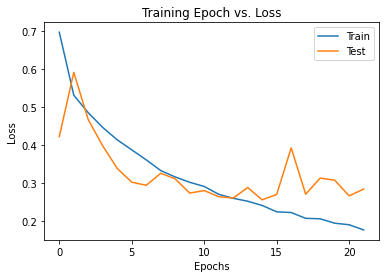

In [39]:
from keras.callbacks import History
#  Visualize loss history / model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training Epoch vs. Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

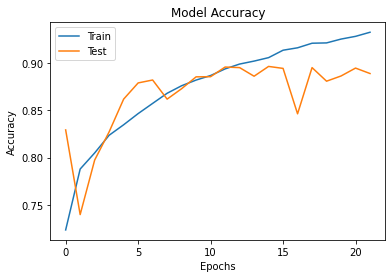

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

This completes the CNN architecture